<a href="https://colab.research.google.com/github/vini1lol/Harvardx/blob/master/CaseStudy3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import random

In [0]:
p1 = np.array([1,1])
p2 = np.array([4,4])

In [4]:
np.sqrt(np.sum(np.power(p1-p2,2)))

4.242640687119285

In [0]:
def distance_a(p1,p2):
  """
  Find the distance between points p1 and p2.
  """
  return np.sqrt(np.sum(np.power(p1-p2,2)))

In [7]:
distance(p1,p2)

4.242640687119285

In [0]:
def majority_vote(votes):
  vote_counts= {}
  for vote in votes:
    if vote in vote_counts:
      vote_counts[vote] +=1
    else:
      vote_counts[vote] = 1
  winner = []
  max_count = max(vote_counts.values())
  for vote,count in vote_counts.items():
    if count == max_count:
      winner.append(vote)
  return random.choice(winner)

In [0]:
votes = [1,2,3,1,2,3,1,2,3,3,3,3,2,2,2]

In [27]:
majority_vote(votes)

2

In [0]:
import scipy.stats as ss
def majority_vote_short(votes):
  mode,count=ss.mstats.mode(votes)
  return mode


In [30]:
majority_vote_short(votes)

array([2.])

In [0]:
points = np.array([[1,1], [1,2], [1,3], [2,1], [2,2], [2,3], [3,1], [3,2], [3,3]])
p = np.array([2.5,2])

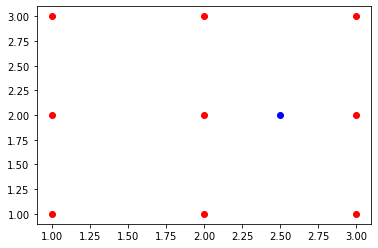

In [35]:
import matplotlib.pyplot as plt
plt.plot(points[:,0],points[:,1],"ro")
plt.plot(p[0],p[1],"bo")

In [0]:
distance = np.zeros(points.shape[0])
for i in range(len(distance)):
  distance[i] = distance_a(p,points[i])

In [42]:
distance

array([1.80277564, 1.5       , 1.80277564, 1.11803399, 0.5       ,
       1.11803399, 1.11803399, 0.5       , 1.11803399])

In [43]:
ind = np.argsort(distance)
ind

array([4, 7, 3, 5, 6, 8, 1, 0, 2])

In [44]:
distance[ind]

array([0.5       , 0.5       , 1.11803399, 1.11803399, 1.11803399,
       1.11803399, 1.5       , 1.80277564, 1.80277564])

In [45]:
distance[ind[0:2]]

array([0.5, 0.5])

In [0]:
def find_nearest_neighbors(p,points,k=5):
  distance = np.zeros(points.shape[0])
  for i in range(len(distance)):
    distance[i] = distance_a(p,points[i])
  ind = np.argsort(distance)
  return ind[:k]

In [47]:
ind = find_nearest_neighbors(p,points,2);print(points[ind])

[[2 2]
 [3 2]]


In [0]:
def knn_predict(p,points,outcomes,k=5):
  ind = find_nearest_neighbors(p,points,k)
  return majority_vote(outcomes[ind])

In [0]:
outcomes = np.array([0,0,0,0,1,1,1,1,1])

In [50]:
knn_predict(np.array([2.5,2.7]),points,outcomes,2)

1

In [51]:
knn_predict(np.array([1.0,2.7]),points,outcomes,2)


0

In [0]:
def generate_synth_data(n=50):
  points = np.concatenate((ss.norm(0,1).rvs((n,2)),ss.norm(1,1).rvs((n,2))),axis=0)
  outcomes = np.concatenate((np.repeat(0,n),np.repeat(1,n)))
  return (points,outcomes)

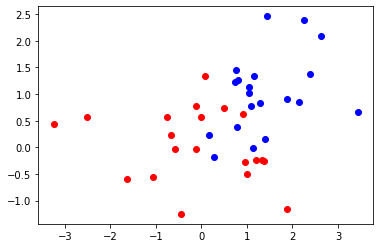

In [56]:
n=20
(points,outcomes) = generate_synth_data(n)
plt.figure
plt.plot(points[:n,0],points[:n,1],"ro")
plt.plot(points[n:,0],points[n:,1],"bo")


In [0]:
def make_prediction_grid(predictors,outcomes,limits,h,k):
  (x_min,x_max,y_min,y_max) = limits
  xs = np.arange(x_min,x_max,h)
  ys = np.arange(y_min,y_max,h)
  xx,yy = np.meshgrid(xs,ys)
  prediction_grid = np.zeros(xx.shape,dtype=int)
  for i,x in enumerate(xs):
    for j,y in enumerate(ys):
      p = np.array([x,y])
      prediction_grid[j,i] = knn_predict(p,predictors,outcomes,k)
  return (xx,yy,prediction_grid)

In [0]:
def plot_prediction_grid (xx, yy, prediction_grid, filename):
    """ Plot KNN predictions for every point on the grid."""
    from matplotlib.colors import ListedColormap
    background_colormap = ListedColormap (["hotpink","lightskyblue", "yellowgreen"])
    observation_colormap = ListedColormap (["red","blue","green"])
    plt.figure(figsize =(10,10))
    plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)
    plt.scatter(predictors[:,0], predictors [:,1], c = outcomes, cmap = observation_colormap, s = 50)
    plt.xlabel('Variable 1'); plt.ylabel('Variable 2')
    plt.xticks(()); plt.yticks(())
    plt.xlim (np.min(xx), np.max(xx))
    plt.ylim (np.min(yy), np.max(yy))
    plt.savefig(filename)

In [0]:
(predictors,outcomes) = generate_synth_data()

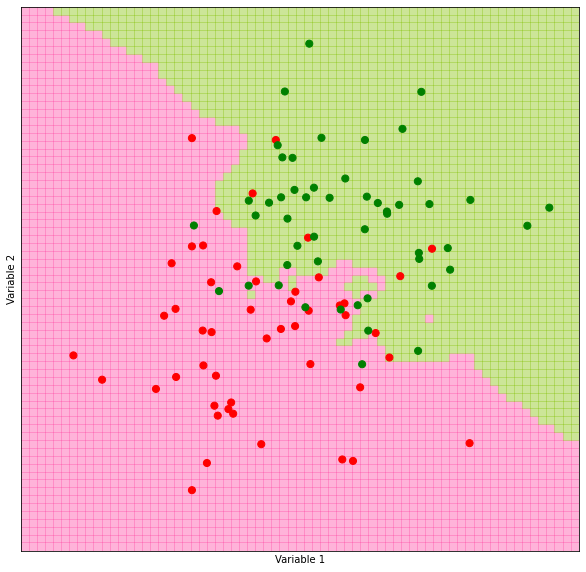

In [61]:
k=5;filename="knn_synth_5.pdf";limits=(-3,4,-3,4);h=0.1
(xx,yy,prediction_grid) = make_prediction_grid(predictors,outcomes,limits,h,k)
plot_prediction_grid(xx,yy,prediction_grid,filename)

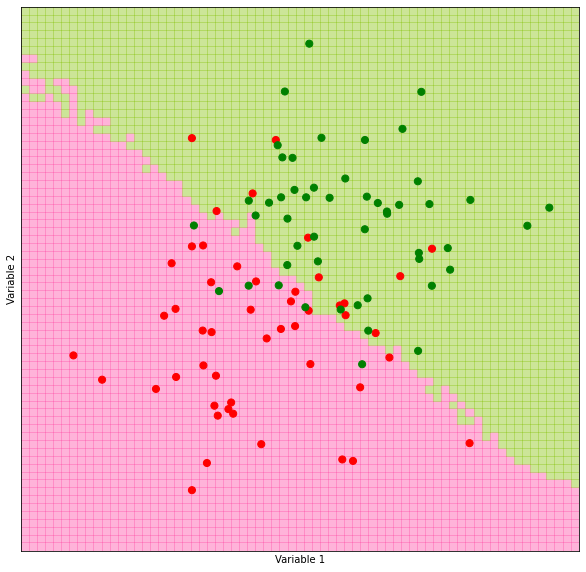

In [62]:
k=50;filename="knn_synth_50.pdf";limits=(-3,4,-3,4);h=0.1
(xx,yy,prediction_grid) = make_prediction_grid(predictors,outcomes,limits,h,k)
plot_prediction_grid(xx,yy,prediction_grid,filename)

In [0]:
from sklearn import datasets
iris = datasets.load_iris()

In [0]:
predictors = iris.data[:,0:2]
outcomes = iris.target

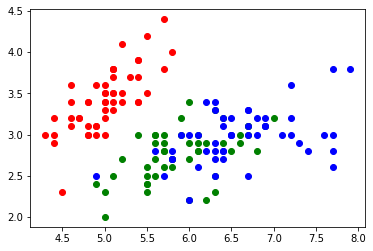

In [68]:
plt.plot(predictors[outcomes == 0][:,0],predictors[outcomes==0][:,1],"ro")
plt.plot(predictors[outcomes == 1][:,0],predictors[outcomes==1][:,1],"go")
plt.plot(predictors[outcomes == 2][:,0],predictors[outcomes==2][:,1],"bo")
plt.savefig("iris.pdf")

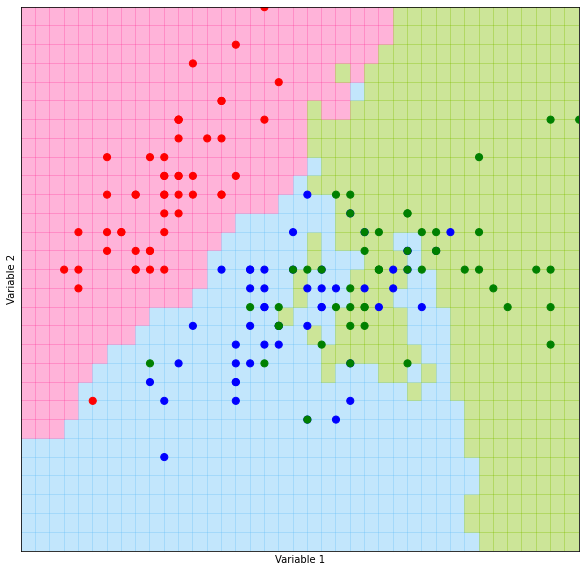

In [69]:
k=5;filename="iris_grid.pdf";limits=(4,8,1.5,4.5);h=0.1
(xx,yy,prediction_grid) = make_prediction_grid(predictors,outcomes,limits,h,k)
plot_prediction_grid(xx,yy,prediction_grid,filename)

In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(predictors,outcomes)
sk_predictions = knn.predict(predictors)

In [75]:
sk_predictions.shape

(150,)

In [0]:
my_predictions = np.array([knn_predict(p,predictors,outcomes,5) for p in predictors])

In [79]:
print(100*np.mean(sk_predictions == my_predictions))
print(100*np.mean(sk_predictions == outcomes))
print(100*np.mean(my_predictions == outcomes))


96.0
83.33333333333334
84.66666666666667
